In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation= 'relu', name='layer_1'),
    Dense(16, activation= 'relu', name='layer_2'),
    Dense(10, activation= 'softmax')
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
layer_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [5]:
model1_new = Sequential([Flatten(input_shape =(28,28)),
                         Dense(16, activation='relu', name= 'layer_1'),
                         Dense(16, activation='relu'),
                         Dense(10), 
                         Softmax()])

In [6]:
model1_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [8]:
# Build the Sequential convolutional neural network model
model2= Sequential([
    Conv2D(16, kernel_size=(3,3), activation ='relu', input_shape=(1,28,28), data_format='channels_first'),
    MaxPooling2D((3,3), data_format='channels_first'),
    Flatten(),
    Dense(10, activation= 'softmax')
    
])

In [9]:
# Print the model summary

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 26, 26)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 8, 8)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = Sequential([
    Conv2D(16, padding='SAME', strides=2, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(3,3),
    Flatten(), 
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [46]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate= 0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = opt,#'adam', #sgd, 'rmsprop', 'adadelta'
             loss= 'sparse_categorical_crossentropy', #spare_categorical_crossentropy, 'mean_squared_error', 
             metrics=[acc, mae])

'''
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum= 0.9, nestrov= True)
             loss= tf.keras.losses.BinaryCrossentropy(from_logits= True) ## for when the final output func is set as linear
             metrics=[tf.keras.metrics.BinaryAccuracy(threshold =0.7), tf.keras.metrics.MeanAbsoluteError()])
'''

'\nmodel.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum= 0.9, nestrov= True)\n             loss= tf.keras.losses.BinaryCrossentropy(from_logits= True) ## for when the final output func is set as linear\n             metrics=[tf.keras.metrics.BinaryAccuracy(threshold =0.7), tf.keras.metrics.MeanAbsoluteError()])\n'

In [47]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f653c4ddb38>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f653c4ddac8>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [13]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [14]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [48]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [50]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [51]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

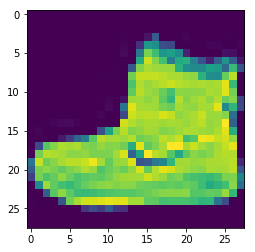

label: Ankle boot


In [53]:
# Display one of the images

i = 0 
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[i]]}')

#### Fit the model

In [58]:
# Fit the model
#model.fit(train_images, train_labels, epochs=2, batch_size=256) --> error because of the shape of train, in the sequential model, i alter the dimensions
history =model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=256, verbose =2) # adding verbose this will only result

Train on 60000 samples
Epoch 1/8
60000/60000 - 19s - loss: 0.3534 - sparse_categorical_accuracy: 0.8698 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 - 18s - loss: 0.3380 - sparse_categorical_accuracy: 0.8745 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 - 18s - loss: 0.3249 - sparse_categorical_accuracy: 0.8795 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 - 18s - loss: 0.3150 - sparse_categorical_accuracy: 0.8833 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 - 18s - loss: 0.3094 - sparse_categorical_accuracy: 0.8861 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 - 18s - loss: 0.3017 - sparse_categorical_accuracy: 0.8871 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 - 18s - loss: 0.2944 - sparse_categorical_accuracy: 0.8897 - mean_absolute_error: 4.4200
Epoch 8/8
60000/60000 - 18s - loss: 0.2858 - sparse_categorical_accuracy: 0.8930 - mean_absolute_error: 4.4200


#### Plot training history

In [59]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.353374,0.869800,4.420000
1,0.338040,0.874550,4.420000
2,0.324947,0.879450,4.419999
3,0.315048,0.883283,4.419999
4,0.309446,0.886083,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

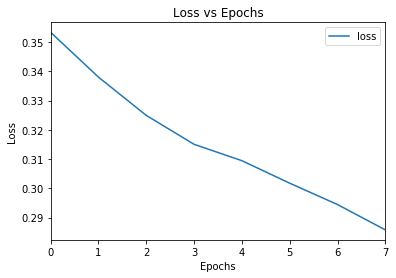

In [60]:
# Make a plot for the loss

loss_plot= df.plot(y='loss', title= 'Loss vs Epochs', legend = True)
loss_plot.set(xlabel = 'Epochs', ylabel= 'Loss')

[Text(0, 0.5, 'sparse_categorical_accuracy'), Text(0.5, 0, 'Epochs')]

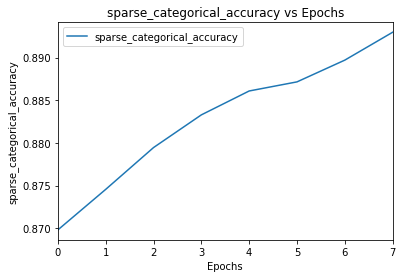

In [61]:
# Make a plot for the accuracy

sparse_plot= df.plot(y='sparse_categorical_accuracy', title= 'sparse_categorical_accuracy vs Epochs', legend = True)
sparse_plot.set(xlabel = 'Epochs', ylabel= 'sparse_categorical_accuracy')

[Text(0, 0.5, 'mean_absolute_error'), Text(0.5, 0, 'Epochs')]

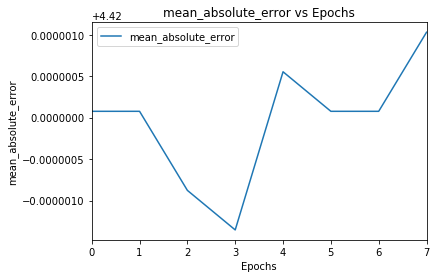

In [62]:
# Make a plot for the additional metric


mae_plot= df.plot(y='mean_absolute_error', title= 'mean_absolute_error vs Epochs', legend = True)
mae_plot.set(xlabel = 'Epochs', ylabel= 'mean_absolute_error')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [24]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [65]:
# Evaluate the model

test_loss, test_acc, test_mae= model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

10000/1 - 2s - loss: 0.3569 - sparse_categorical_accuracy: 0.8752 - mean_absolute_error: 4.4200


#### Make predictions from the model

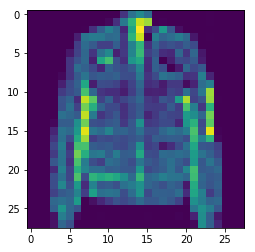

Label: Coat


In [66]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx = 30
test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [70]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,..., np.newaxis])
f'Model predictions: {labels[np.argmax(predictions)]}'

'Model predictions: Coat'